# Classification Algorithms
- Naive Bayes
- Decision Tree
- Random Forest
- SVM

In [1]:
# pip install pydotplus

In [2]:
# import yang diperlukan
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # support vector classifier

# prep data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# evaluasi
from sklearn.metrics import confusion_matrix, classification_report

# import data
from sklearn import datasets

# visualisasi Decision Tree model
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

# Naive Bayes

In [3]:
# buat dummy data
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [4]:
# encoding karena datanya berbentuk string
le = LabelEncoder()
weather_en = le.fit_transform(weather)
weather_label = le.classes_

temp_en = le.fit_transform(temp)
temp_label = le.classes_

play_en = le.fit_transform(play)
play_label = le.classes_

print("weather", weather_label)
print("temp", temp_label)
print("play", play_label)

df = pd.DataFrame({"weather": weather_en, "temp":temp_en, "play":play_en})
features = df[['weather', 'temp']]
target = df['play']

print(features)
print(target)

weather ['Overcast' 'Rainy' 'Sunny']
temp ['Cool' 'Hot' 'Mild']
play ['No' 'Yes']
    weather  temp
0         2     1
1         2     1
2         0     1
3         1     2
4         1     0
5         1     0
6         0     0
7         2     2
8         2     0
9         1     2
10        2     2
11        0     2
12        0     1
13        1     2
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [5]:
# buat dan latih model
model = GaussianNB()
model.fit(features, target)

GaussianNB()

In [6]:
# buat prediksi, misalkan saat hujan dan panas, apakah main?
# hujan: 1, panas: 1
model.predict([[1,1]])

array([1], dtype=int64)

In [7]:
# evaluasi keakuratan model
model.score(features, target)

0.7142857142857143

In [8]:
# classification report dan confusion matrix
print(classification_report(target, model.predict(features)))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



In [9]:
print(confusion_matrix(target, model.predict(features)))

[[3 2]
 [2 7]]


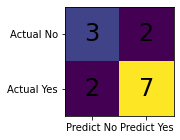

In [10]:
cm = confusion_matrix(target, model.predict(features))
fig, ax = plt.subplots(figsize=(2,2))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predict No', 'Predict Yes'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual No', 'Actual Yes'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24)
plt.show()

# Naive Bayes with Multiple class

In [11]:
# import dataset wine
# data ini di downdload dari ...
wine = datasets.load_wine()

# fitur apa saja
print("Features:", wine.feature_names, len(wine.feature_names))

# targetnya apa saja
print("Label:", wine.target_names, len(wine.target_names))

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 13
Label: ['class_0' 'class_1' 'class_2'] 3


In [12]:
wine.data.shape

(178, 13)

In [13]:
wine.target.shape

(178,)

In [14]:
# pisah jadi training dan testing data
x_train, x_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.3, random_state=109)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(124, 13) (54, 13)
(124,) (54,)


In [15]:
# buat dan latih model
model = GaussianNB().fit(x_train, y_train)

# gunakan test data untuk buat prediksi
hasil_prediksi = model.predict(x_test)

# ukur/ evaluasi dari hasil test data
print(classification_report(y_test, hasil_prediksi))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.94      0.79      0.86        19
           2       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



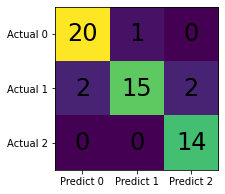

In [16]:
cm = confusion_matrix(y_test, hasil_prediksi)
fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('Predict 0', 'Predict 1', 'Predict 2'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('Actual 0', 'Actual 1', 'Actual 2'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24)
plt.show()

# Decision Tree

In [17]:
# import data
df_diabet = pd.read_csv("dataset/diabetes.csv")

print(df_diabet.columns)
print(df_diabet.shape)
display(df_diabet)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
df_diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
# cek jumlah missing value
df_diabet.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure',
                      'SkinThickness', 'Insulin',
                      'BMI', 'DiabetesPedigreeFunction',
                      'Age']

In [21]:
# prep data, pisahkan jadi train dan test data
features = df_diabet[feature_cols]
target = df_diabet['Outcome']

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(537, 8) (231, 8)
(537,) (231,)


In [22]:
# buat dan latih model
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)

hasil_prediksi = model.predict(x_test)

# evaluasi
print(classification_report(y_test, hasil_prediksi))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       146
           1       0.59      0.53      0.56        85

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Visualisasi model Decision Tree
- install graphviz
- install pydotplus
- import:
    - sklearn.tree
    - StringIO dari six
    - Image dari IPython.display

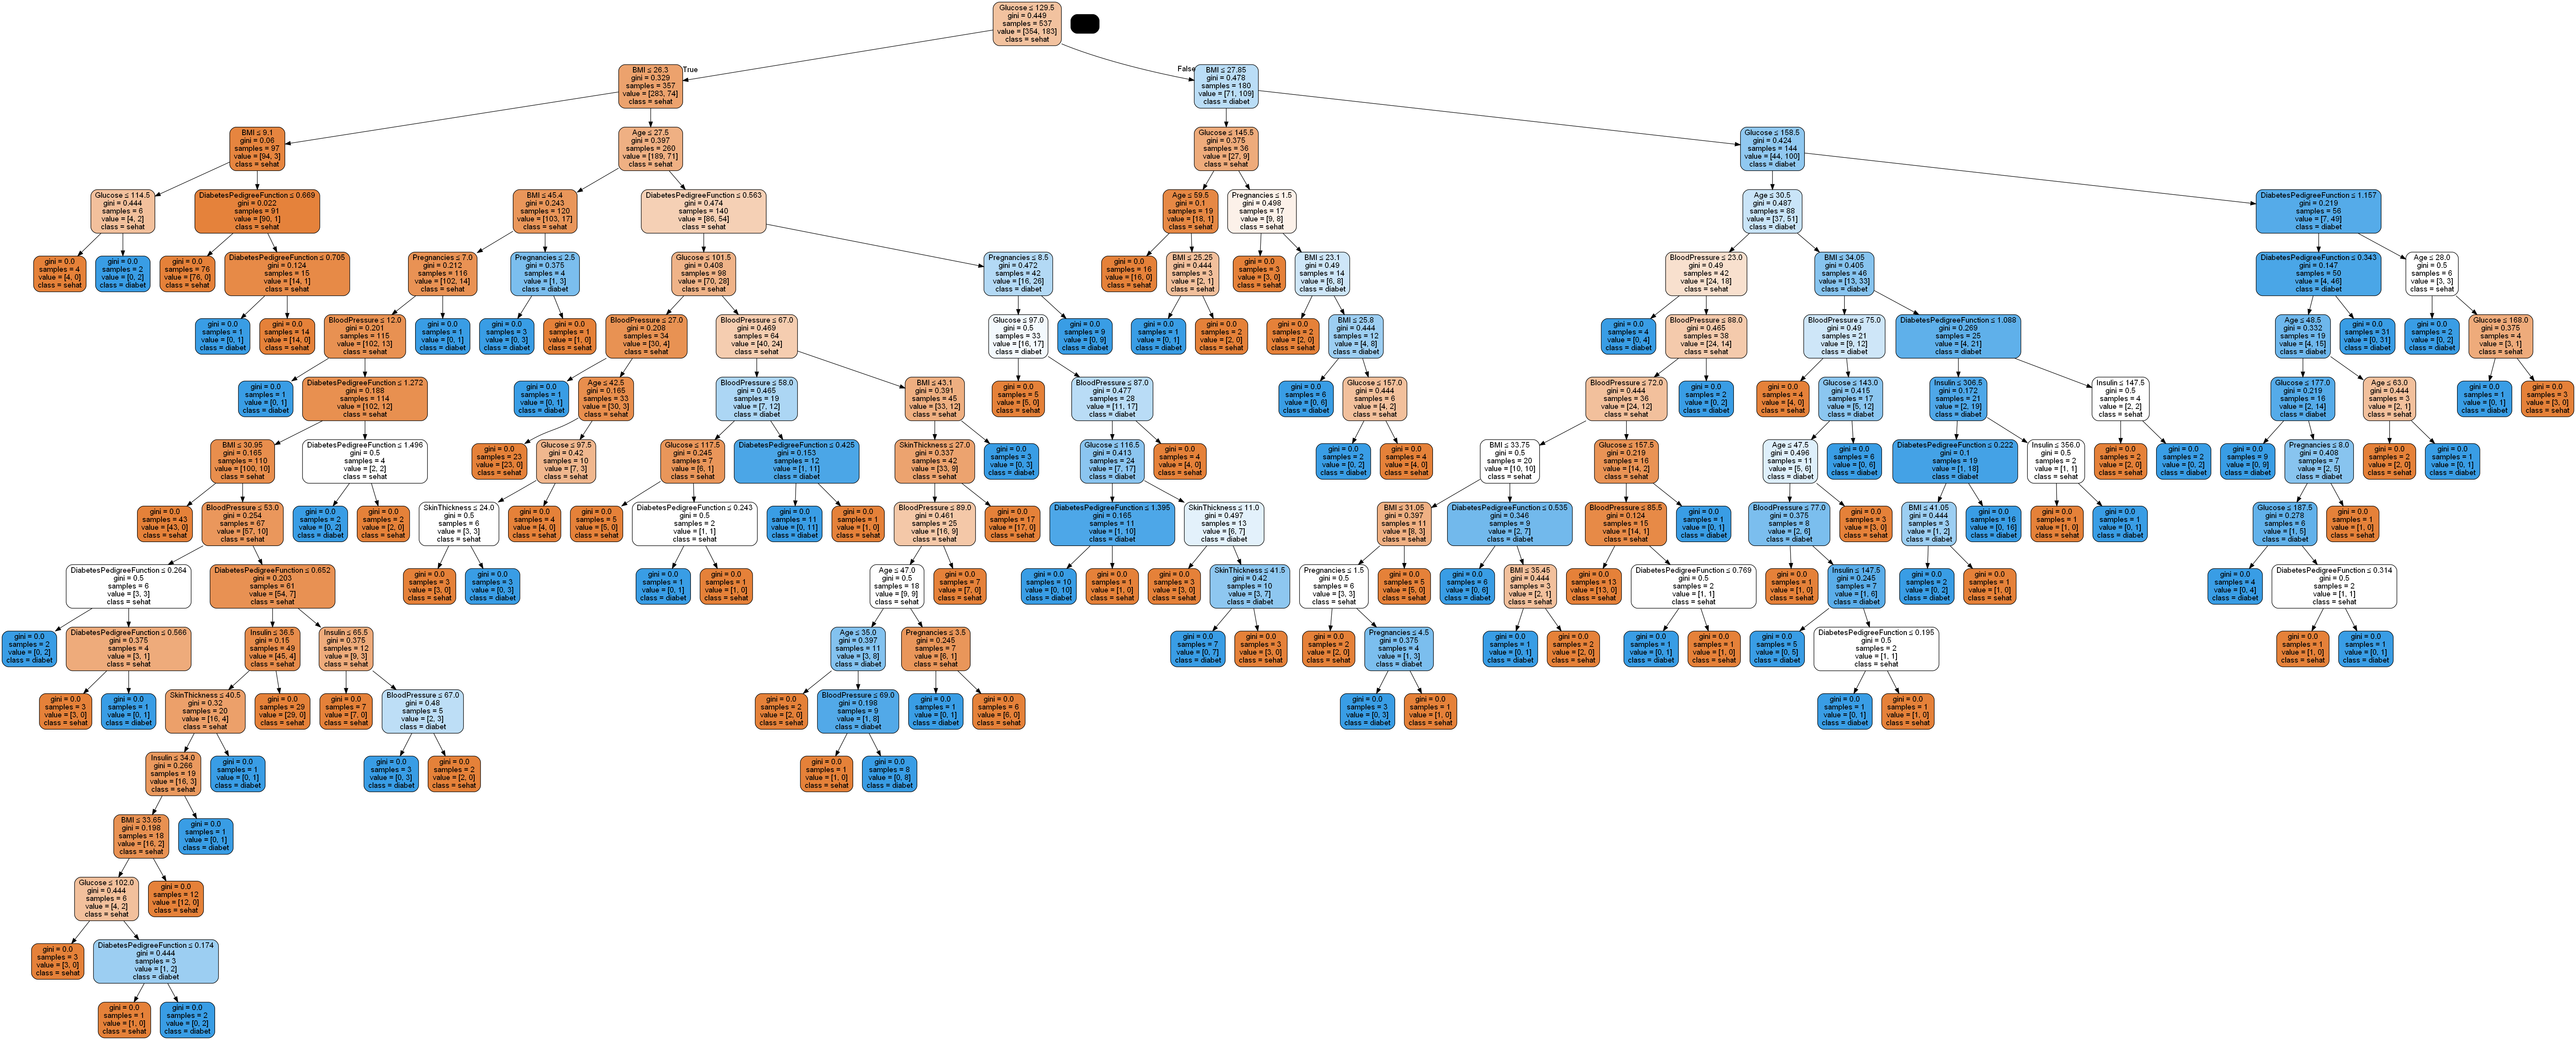

In [23]:
dot_data = StringIO()
tree.export_graphviz(model,
                     out_file=dot_data,
                     class_names=['sehat', 'diabet'],
                     feature_names=feature_cols,
                     filled=True,
                     rounded=True,
                     special_characters=True
                    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       146
           1       0.72      0.56      0.63        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



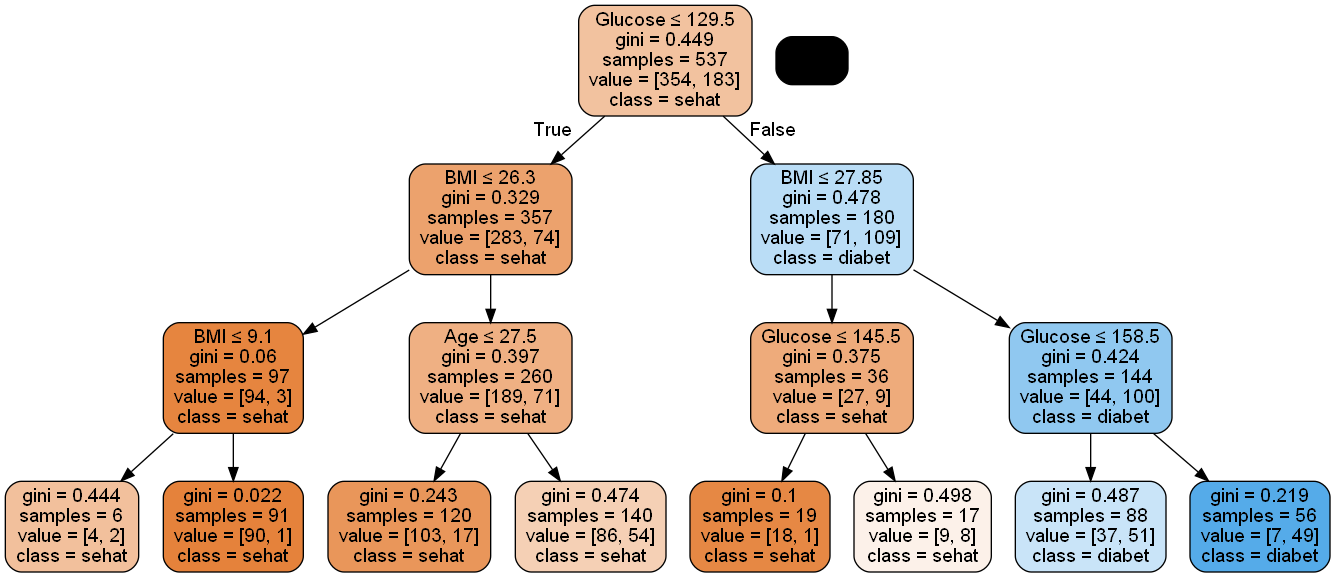

In [24]:
# buat dan latih model
# tambahkan opsi criterion, splitter, max_depth
model = DecisionTreeClassifier(random_state=0,
                               max_depth=3,
                               criterion='gini'
                              )
model.fit(x_train, y_train)

hasil_prediksi = model.predict(x_test)

# evaluasi
print(classification_report(y_test, hasil_prediksi))

# visualisasi
dot_data = StringIO()
tree.export_graphviz(model,
                     out_file=dot_data,
                     class_names=['sehat', 'diabet'],
                     feature_names=feature_cols,
                     filled=True,
                     rounded=True,
                     special_characters=True
                    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest
menggunakan banyak decision tree (100 biasanya) untuk membuat prediksi

In [25]:
# gunakan data yang sama, jadi sudah di import dan di prep, sudah di split
# buat dan latih model
model = RandomForestClassifier(random_state=10)
model.fit(x_train, y_train)

hasil_prediksi = model.predict(x_test)

#evaluasi
print(classification_report(y_test, hasil_prediksi))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       146
           1       0.76      0.65      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.79      0.80      0.79       231



In [26]:
# opsi untuk model bisa kita ubah:
# jumlah pohon, n_estimators
# criterion, max_depth
model = RandomForestClassifier(random_state=10,
                               max_depth=3,
                               criterion='gini',
                               n_estimators=300)
model.fit(x_train, y_train)

hasil_prediksi = model.predict(x_test)

#evaluasi
print(classification_report(y_test, hasil_prediksi))

              precision    recall  f1-score   support

           0       0.76      0.92      0.84       146
           1       0.80      0.51      0.62        85

    accuracy                           0.77       231
   macro avg       0.78      0.72      0.73       231
weighted avg       0.78      0.77      0.76       231



In [27]:
# random forest classifier bisa memperlihatkan 
# tingkat kepentingan fitur ke target
model.feature_importances_

array([0.05966743, 0.35427193, 0.04106895, 0.03287653, 0.07474821,
       0.21654017, 0.07381066, 0.14701612])

In [28]:
feature_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [29]:
pd.DataFrame({
    "nama fitur": feature_cols, 
    "% importance":model.feature_importances_ 
}).sort_values("% importance", ascending=False)

,nama fitur,% importance
1,Glucose,0.354272
5,BMI,0.216540
7,Age,0.147016
4,Insulin,0.074748
6,DiabetesPedigreeFunction,0.073811
0,Pregnancies,0.059667
2,BloodPressure,0.041069
3,SkinThickness,0.032877


dari sini kita bisa lihat bahwa fitur yang paling menentukan seseorang diabetes adalah tingkat glukosa darahnya (tingkat gula darah), kemudian BMI, kemudian umurnya. Dan yang paling tidak berefek ke status seseorang diabetes/ tidak adalah SkinThickness (ketebalan kulitnya).

In [30]:
# misal kita gunakan 3 fitur terpenting saja
cols = ['Glucose', 'BMI', 'Age']
features = x_train[cols]
target = y_train

# buat dan latih model
model = RandomForestClassifier(random_state=10,
                               max_depth=3,
                               criterion='gini',
                               n_estimators=100)
model.fit(features, target)

hasil_prediksi = model.predict(x_test[cols])

#evaluasi
print(classification_report(y_test, hasil_prediksi))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.75      0.60      0.67        85

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



# Support Vector Machine

In [31]:
# load data
cancer = datasets.load_breast_cancer()

# cek fitur
print("Features:", cancer.feature_names, 
      len(cancer.feature_names))

print()
# cek target/label
print("Labels:", cancer.target_names, 
     len(cancer.target_names))

print()
# cek ukuran data
print(cancer.data.shape)

# masukkan data ke sebuah dataframe
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['label'] = pd.Series(cancer.target)

# print lima baris pertama
display(df.head())

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 30

Labels: ['malignant' 'benign'] 2

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [33]:
# pisahkan fitur dengan label
features = df[cancer.feature_names]
target = df['label']

# pisahkan jadi training dan testing data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

print(x_train.shape, x_test.shape)

(398, 30) (171, 30)


In [34]:
# buat dan latih model
model = SVC().fit(x_train, y_train)

# evaluasi keakuratan model
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89        63
           1       0.90      0.99      0.94       108

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171

